
# Machine Learning Project Proposal #

## Exploring Used Car Auction: *Prices and Predicting the Possible End Price*

### Simon Coessens, Rana Islek

### April 2024



### Necessary Libraries

In [1]:
!pip install numpy==1.23.5
!pip install pandas==1.5.2
import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 34.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.86 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
pandas-stubs 2.0.3.230814 requires numpy>=1.25.0; python_version >= "3.9", but you have numpy 1.23.5 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 16.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.2 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import skew
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pd.set_option('display.max_columns', None)
%matplotlib inline
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

### Import Data

In [4]:
dfcar = pd.read_csv('/content/drive/My Drive/ml-project/data/dfcar_processed.csv', on_bad_lines='skip')
dfcar.head(2)

,vin,year,brand,body_simple,model,trim,made_in,transmission,condition,color,interior,car_age,odometer,state,seller,sellingprice,mmr,is_sold_below_mmr,day_of_week,is_weekend,hour_only,month_year,sale_date,sale_year,latitude,longitude
0,wba3c1c51ek116351,2014,BMW,Sedan,3 Series,328I SULEV,DEU,Automatic,4.5,Gray,Black,1,1331.0,CA,Financial Services Remarketing (Lease),30000,31900,1,Thu,0,4,Jan-15,2015-01-15,2015,37.271875,-119.270415
1,yv1612tb4f1310987,2015,VOLVO,Sedan,S60,T5,SWE,Automatic,4.1,White,Black,0,14282.0,CA,Volvo Na Rep/World Omni,27750,27500,0,Thu,0,4,Jan-15,2015-01-29,2015,37.271875,-119.270415


In [5]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [6]:
columns_to_drop = ['year','vin','mmr', 'is_sold_below_mmr', 'day_of_week', 'is_weekend', 'is_weekend', 'month_year', 'sale_date', 'latitude', 'longitude', 'hour_only', 'seller']
dfcar = dfcar.drop(columns=columns_to_drop)
dfcar.head(2)

,brand,body_simple,model,trim,made_in,transmission,condition,color,interior,car_age,odometer,state,sellingprice,sale_year
0,BMW,Sedan,3 Series,328I SULEV,DEU,Automatic,4.5,Gray,Black,1,1331.0,CA,30000,2015
1,VOLVO,Sedan,S60,T5,SWE,Automatic,4.1,White,Black,0,14282.0,CA,27750,2015


In [7]:
categorical_features = ['brand', 'body_simple', 'model', 'trim', 'made_in', 'transmission', 'color', 'state', 'interior']
numerical_features = ['condition', 'odometer', 'car_age', 'car_age', 'sale_year']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

X = preprocessor.fit_transform(dfcar.drop(columns=['sellingprice']))
y = dfcar['sellingprice']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred[y_pred < 0] = 0 #Prices can not be negative

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Model Performance:
Mean Absolute Error (MAE): 1596.6069673770041
Mean Squared Error (MSE): 4960402.629200224
Root Mean Squared Error (RMSE): 2227.196136221555
R-squared (R2): 0.9095666159738819


<function matplotlib.pyplot.show(close=None, block=None)>

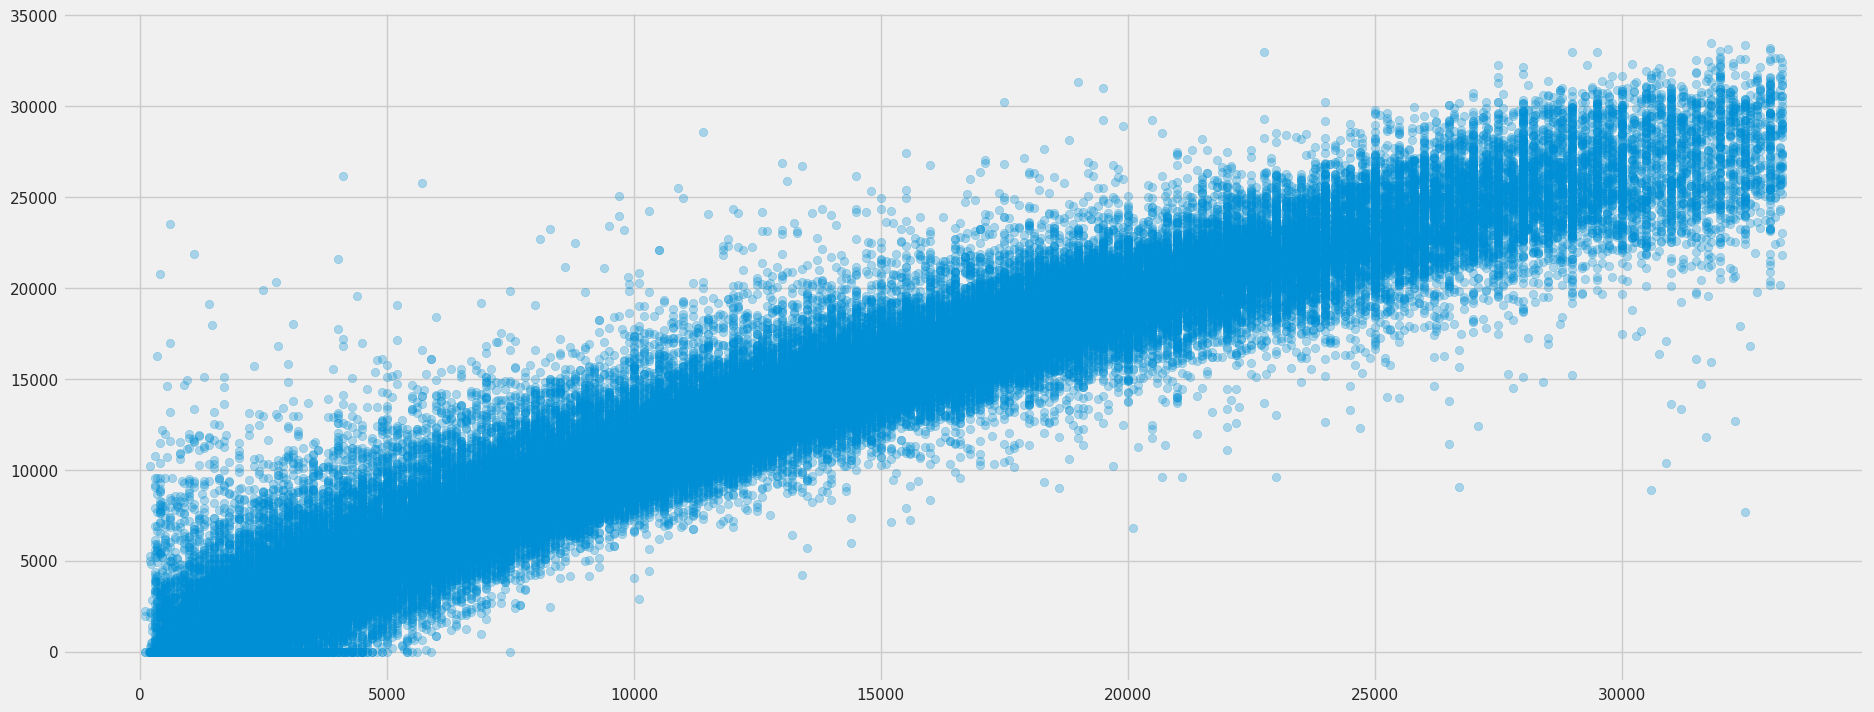

In [10]:
plt.scatter(y_test, y_pred, alpha=0.3)
plt.show

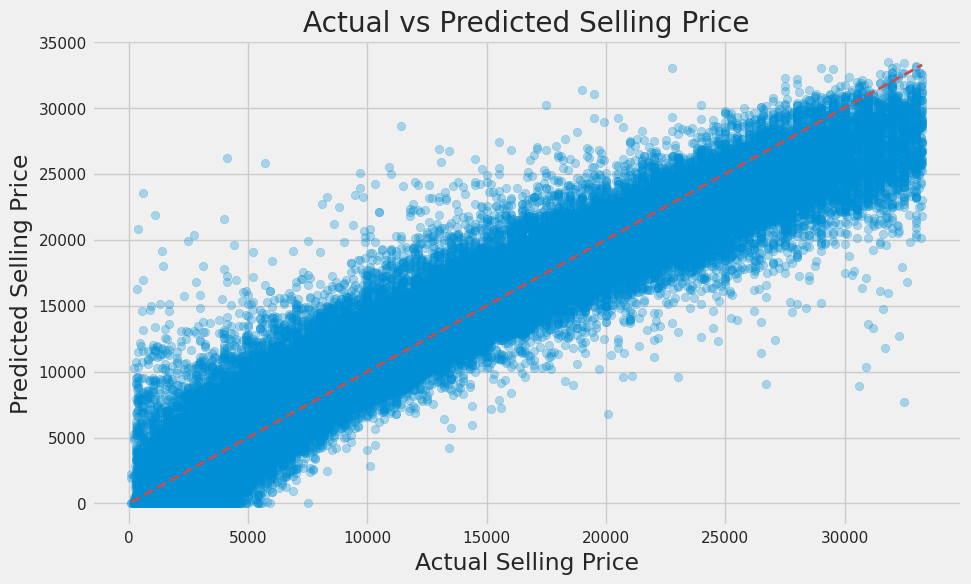

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price')
plt.show()

As we can see the model performs quite well. Only that it predicts negative values, which is of course not possible. So the model was changed to only predict positive values.

In [12]:
def get_user_input_and_predict():
    print("Please enter the following details for prediction:")
    brand = input("Brand: ")
    body_simple = input("Body Type: ")
    model_name = input("Model: ")
    trim = input("Trim: ")
    made_in = input("Made In: ")
    transmission = input("Transmission: ")
    condition = float(input("Condition: "))
    color = input("Color: ")
    interior = input("Interior: ")
    car_age = int(input("Car Age: "))
    odometer = float(input("Odometer: "))
    state = input("State: ")
    seller = input("Seller: ")
    sale_year = int(input("Sale Year: "))

    new_data = pd.DataFrame({
        'brand': [brand],
        'body_simple': [body_simple],
        'model': [model_name],
        'trim': [trim],
        'made_in': [made_in],
        'transmission': [transmission],
        'condition': [condition],
        'color': [color],
        'interior': [interior],
        'car_age': [car_age],
        'odometer': [odometer],
        'state': [state],
        'sale_year': [sale_year]
    })

    new_data_processed = preprocessor.transform(new_data)

    prediction = model.predict(new_data_processed)
    print(f"Predicted value: {prediction[0]}")

#get_user_input_and_predict()

Here the predicted value is 3000 less than the actual price

We can check the assumptions for linear regression now

seperator

In [13]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
265187,10300,8222.095179,2077.904821
171113,10200,10577.019207,-377.019207
246845,2000,0.000000,2000.000000
320254,15700,15732.271291,-32.271291
252665,13000,17019.943296,-4019.943296
...,...,...,...
143726,9200,11004.059111,-1804.059111
409952,3700,3891.285582,-191.285582
27505,15800,15595.197781,204.802219
59100,10800,11672.480714,-872.480714


Additionally, one might want to visualize the predictions versus the

---

actual values to gain more insight into the model's performance:

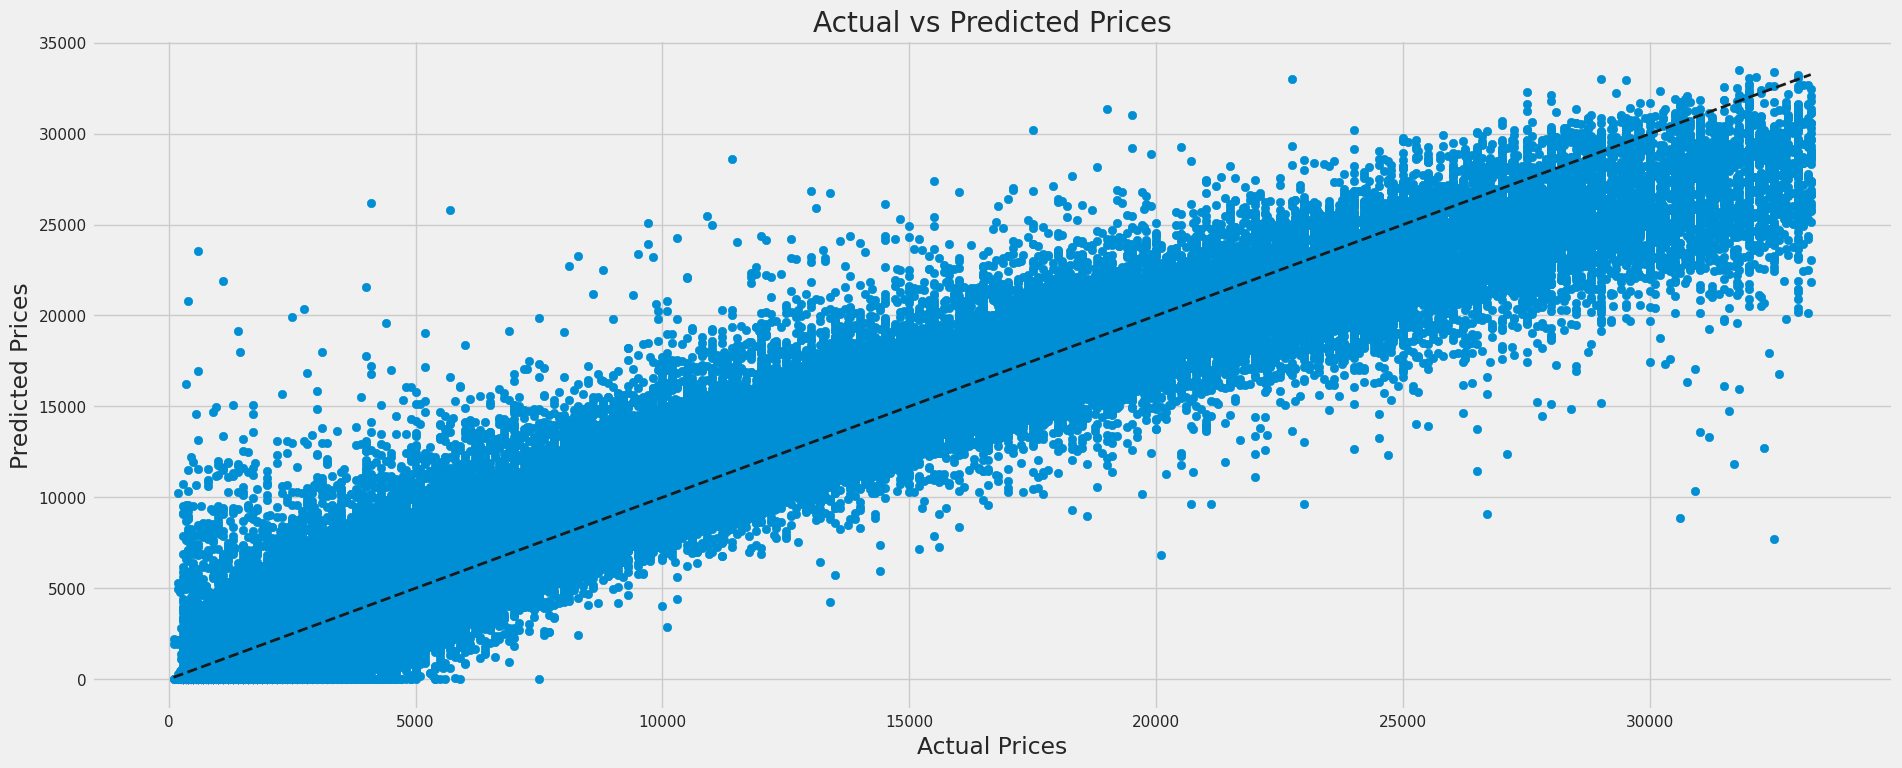

In [14]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

Now we can check the assumptions

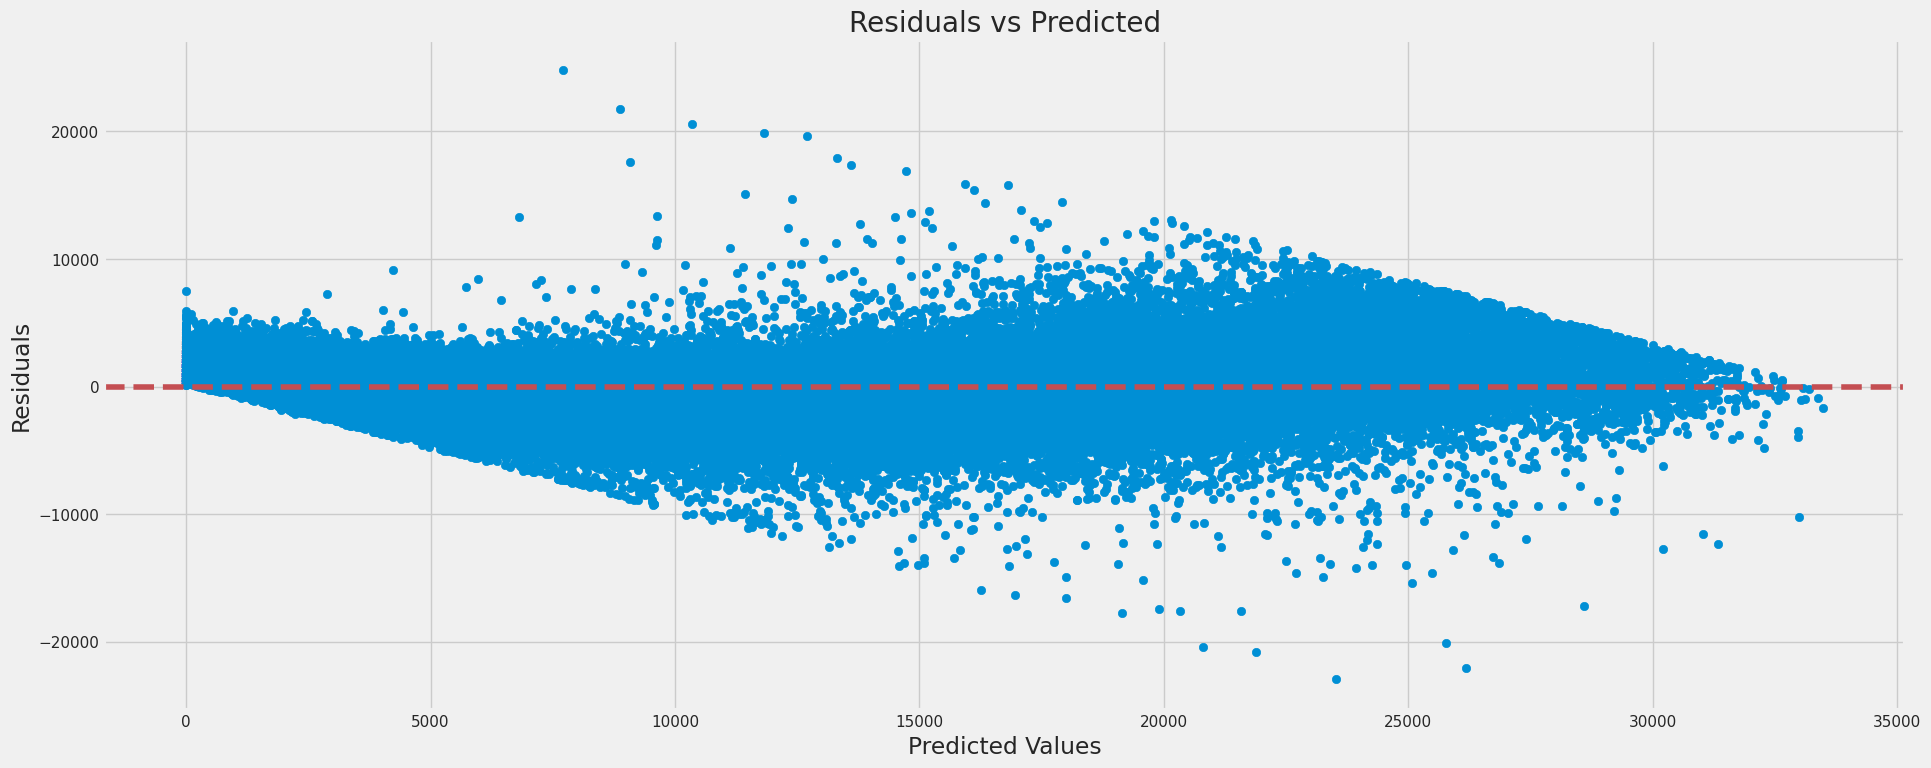

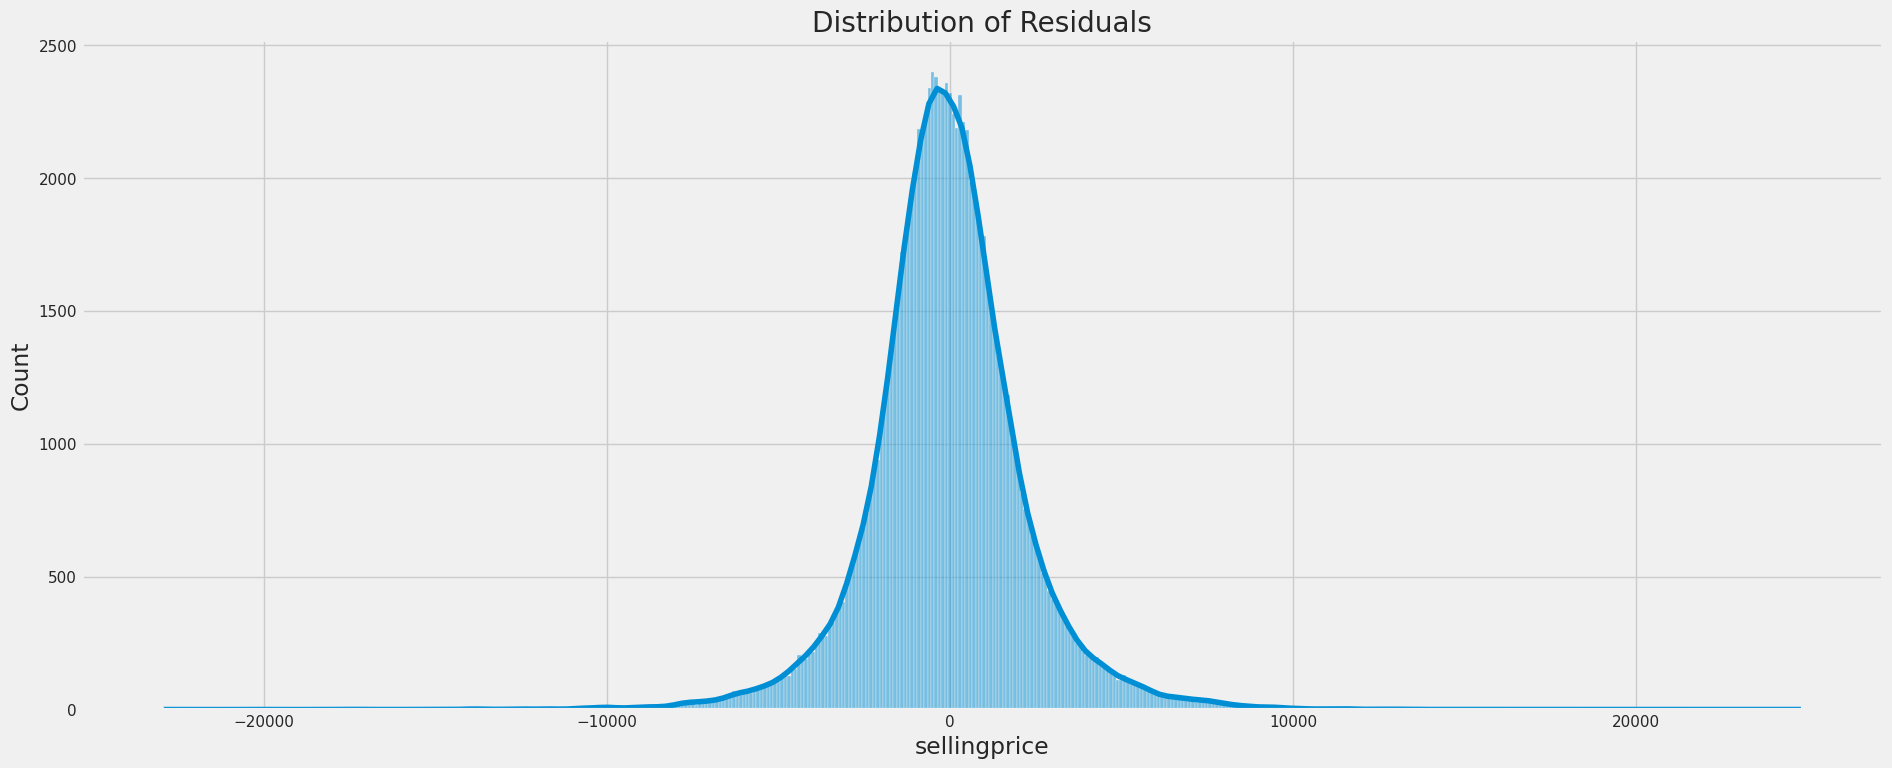

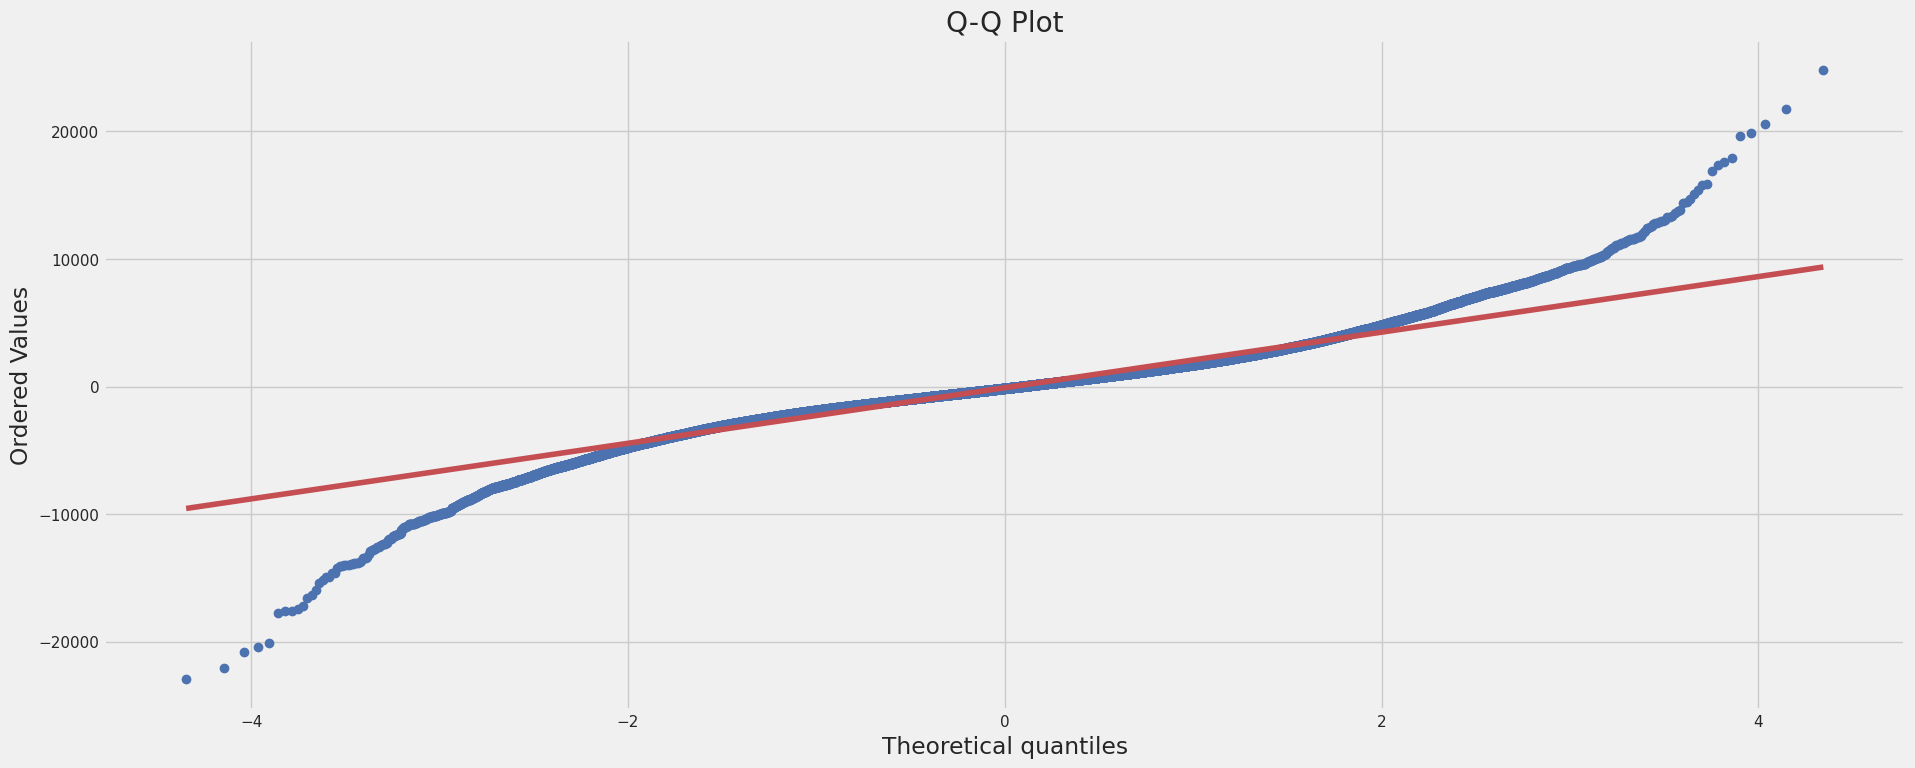

In [15]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.show()

import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

1. Residuals vs Predicted Plot
The "Residuals vs Predicted" plot shows that residuals do not appear to be randomly distributed around the zero line, especially at higher predicted values where we can see a pattern suggesting heteroscedasticity — variability of the residuals is increasing with predicted values. This can be an indicator of model underfitting or that certain important predictive factors or interactions are not captured by the model.

2. Distribution of Residuals
The "Distribution of Residuals" plot displays a distribution that is not centered around zero and is highly skewed to the right. This suggests that the model has a systematic error where it consistently underestimates or overestimates values depending on their magnitude.

3. Q-Q Plot
The Quantile-Quantile (Q-Q) plot further illustrates that the residuals do not follow a normal distribution as expected under the assumptions of linear regression, particularly at the tails. The deviations from the theoretical line at both ends suggest the presence of outliers or extreme values that the model is not handling well.

Save the model

In [16]:
from joblib import dump


model_filename = '/content/drive/My Drive/ml-project/models/LR_model.joblib'
dump(model, model_filename)
print(f"Model saved to {model_filename}")

Model saved to /content/drive/My Drive/ml-project/models/LR_model.joblib


In [18]:
# Cross validation
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate

model = LinearRegression()

scores = cross_validate(model, X, y, cv=5, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'], return_train_score=False)

print("Cross-validated Metrics:")
print("Mean Absolute Error (MAE):", -np.mean(scores['test_neg_mean_absolute_error']))
print("Mean Squared Error (MSE):", -np.mean(scores['test_neg_mean_squared_error']))
print("Root Mean Squared Error (RMSE):", np.sqrt(-np.mean(scores['test_neg_mean_squared_error'])))
print("R-squared (R2):", np.mean(scores['test_r2']))


Cross-validated Metrics:
Mean Absolute Error (MAE): 1716.785570450697
Mean Squared Error (MSE): 5689755.914094493
Root Mean Squared Error (RMSE): 2385.3209247592854
R-squared (R2): 0.8964071032048693
